In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

In [21]:
def phase_track(series, l, n_components):
    '''Get phase trajectory of series.

    Params:
    - series: 2Darray of shape [duration, 1]
    - l: dimensionality of feature space.
    - n_components: Number of components to keep
    while applying PCA to resulting trajectory.

    Output:
    - projection: projection of phase trajectory
    on the principal components.
    - basis: Principal axes in feature space.
    '''
    
    phase = np.zeros([series.shape[0] - l, l])
    
    for i in range(0, series.shape[0] - l):
        phase[i] = np.squeeze(series[ i:i+l, 0])
    
    model = PCA(n_components=n_components)
    projection = model.fit_transform(phase)
    basis = model.components_
    return projection, basis

## Loading data

In [22]:
filename = './data/Dormitory_f_158_54_36_accm.csv'

data = pd.read_csv(filename, delimiter=',', decimal='.')

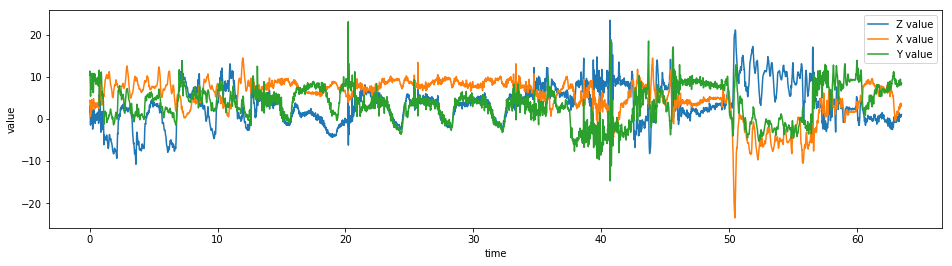

In [23]:
plt.figure(figsize=(16,4))
for i, axis in enumerate(['X_value', 'Y_value', 'Z_value']):
    plt.plot(data['time'], data[axis], label = ['X', 'Y', 'Z'][i - 1] + ' value')
plt.legend(loc = 'best')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

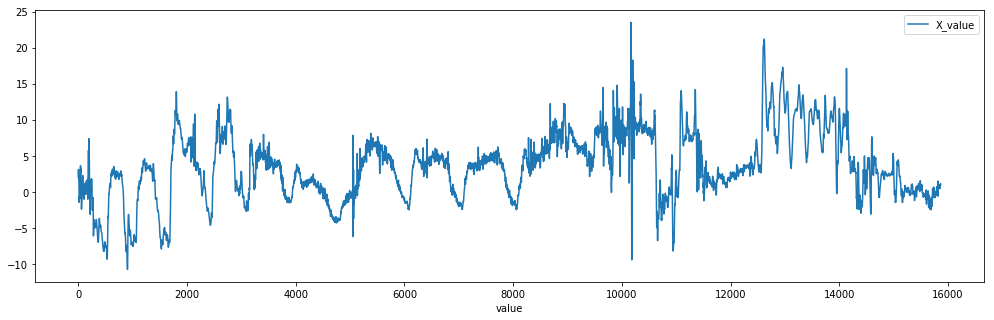

In [24]:
plt.figure(figsize=(17,5))
plt.plot(data['X_value'])
plt.legend(loc = 'best')
plt.xlabel('value')
plt.show()

In [25]:
x_acc = (data['X_value'].values).reshape([-1, 1])

<hr>

In [30]:
track, basis = phase_track(x_acc[5000:8000], 1000, 2)

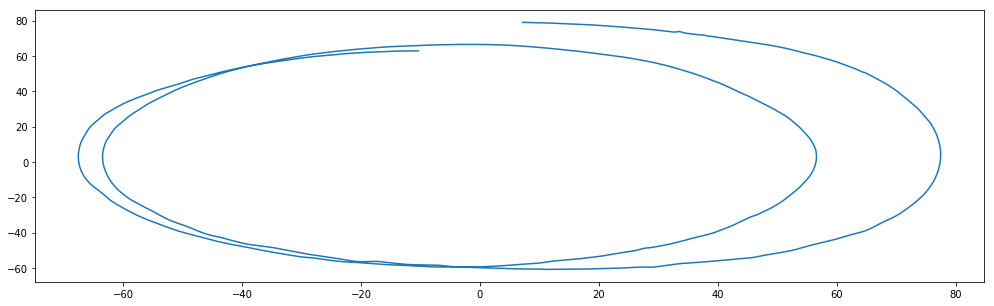

In [29]:
%matplotlib inline

plt.figure(figsize=(17,5))
plt.plot(track[:, 0], track[:, 1])
plt.show()

# Experiments

In [33]:
time = np.arange(0, 100, 0.1)
series1 = np.sin(time)
series2 = np.sin(0.3*time)*np.cos(2*time)
series = np.hstack((series1, series2))

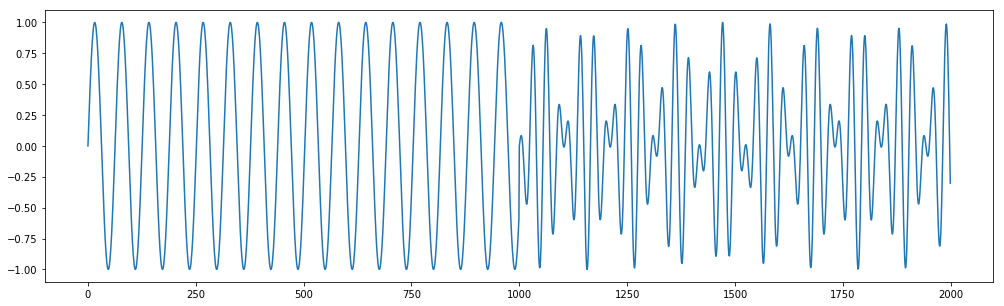

In [34]:
time = np.arange(0, 200, 0.1)
plt.figure(figsize=(17,5))
plt.plot(series)
plt.show()

In [35]:
series = series.reshape([-1, 1])
series.shape

(2000, 1)

In [49]:
track, basis = phase_track(series, 200, 2)

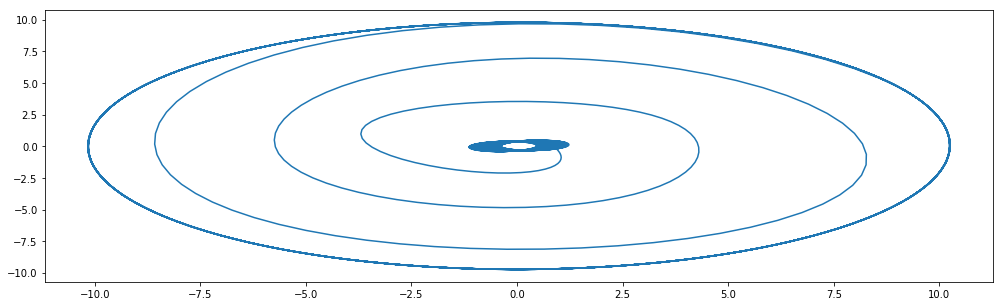

In [50]:
%matplotlib inline

plt.figure(figsize=(17,5))
plt.plot(track[:, 0], track[:, 1])
plt.show()

In [54]:
track, basis = phase_track(series, 200, 3)

<IPython.core.display.Javascript object>


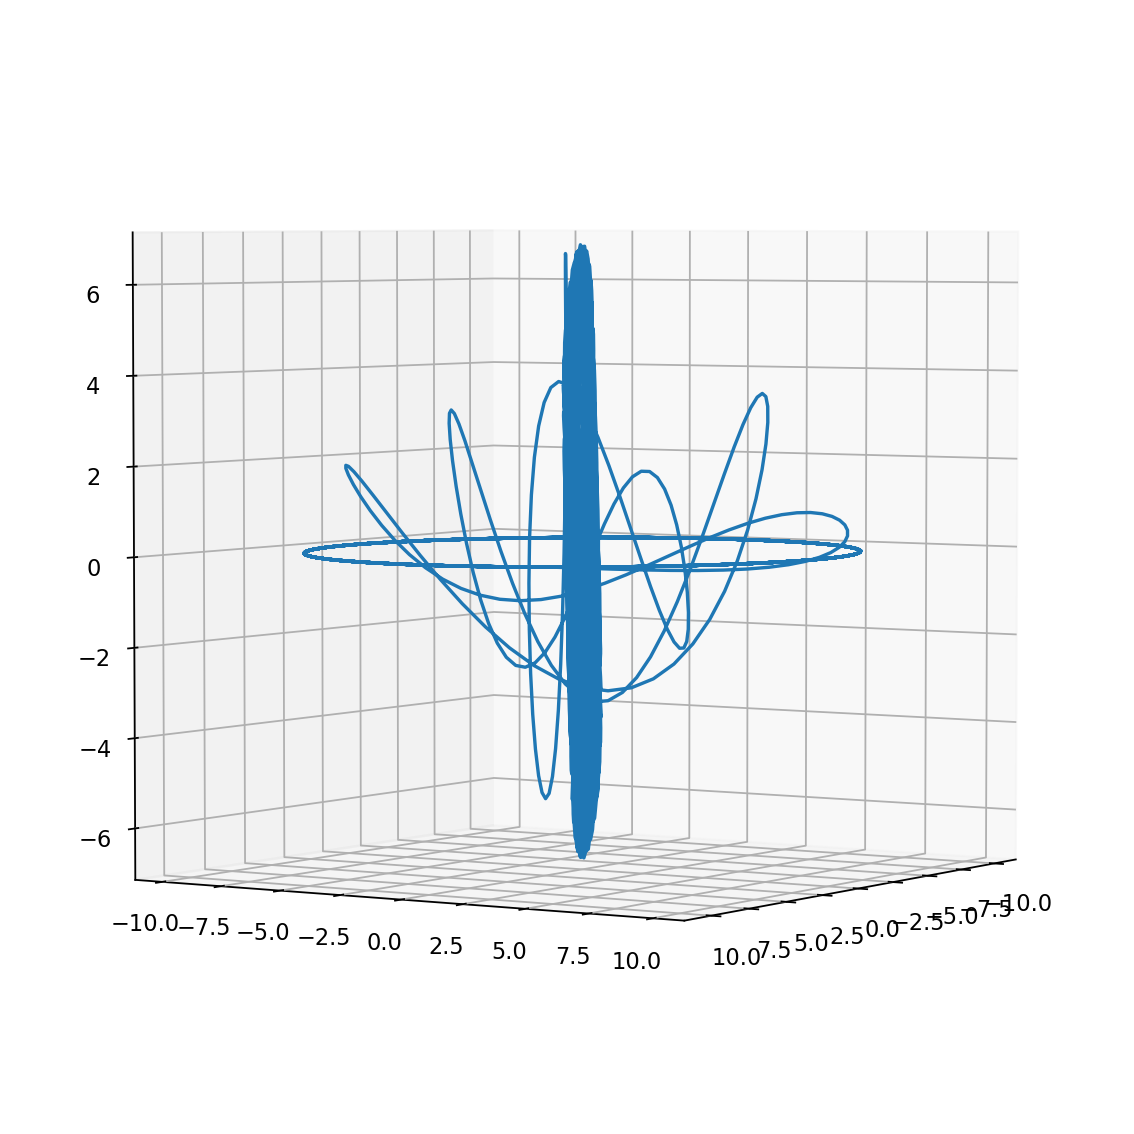

In [55]:
%matplotlib notebook

from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure(figsize=(7,7))
# ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.plot(track[:, 0], track[:, 1], track[:, 2], label='parametric curve')